In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train_txt = pd.read_csv('training_text'
                           , sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
df_train_var = pd.read_csv('training_variants')
df_test_txt = pd.read_csv('test_text',
                          sep='\|\|', header=None, skiprows=1, names=["ID","Text"])

df_test_var = pd.read_csv('test_variants')



df_train = pd.merge(df_train_var, df_train_txt, how='left', on='ID')
df_test = pd.merge(df_test_var, df_test_txt, how='left', on='ID')

C:\Users\ZAS\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
C:\Users\ZAS\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [3]:
print(df_train.head())

   ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                Text  
0  Cyclin-dependent kinases (CDKs) regulate a var...  
1   Abstract Background  Non-small cell lung canc...  
2   Abstract Background  Non-small cell lung canc...  
3  Recent evidence has demonstrated that acquired...  
4  Oncogenic mutations in the monomeric Casitas B...  


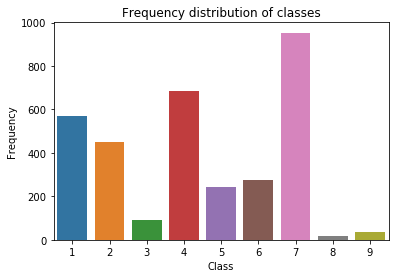

In [4]:
ax = sns.countplot(x="Class",data=df_train)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency distribution of classes')
plt.show()

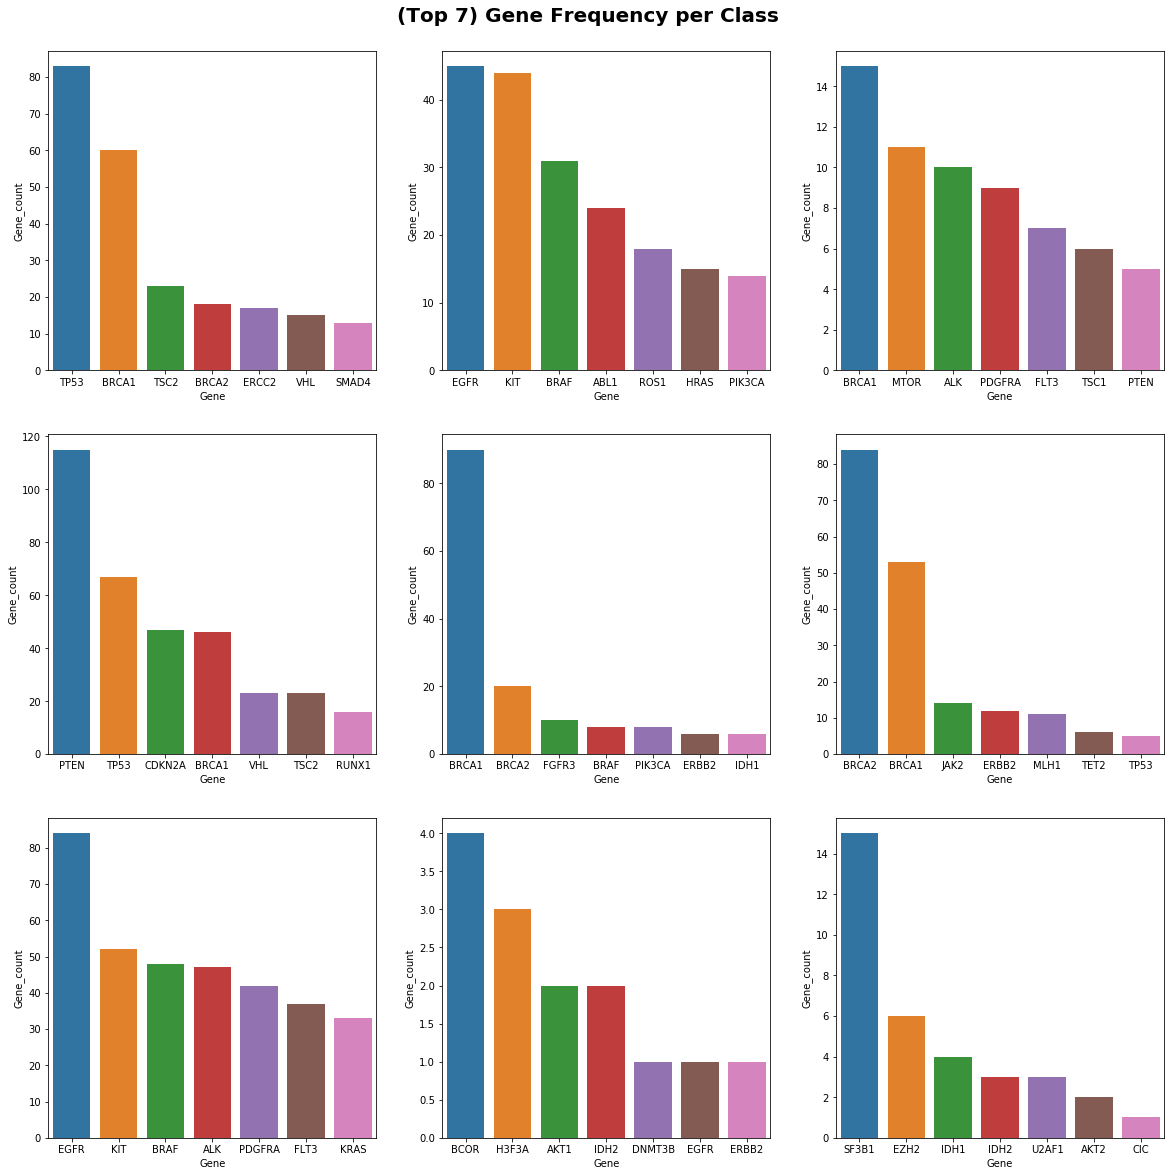

In [5]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20,20))

df_train_var['Gene_count']=df_train_var['ID']  # add a new column to df_train_var called Gene_count and have ID values
for i in range(3):
    for j in range(3):
        # split Gene and count how much it appear in every class 
        gene_count =df_train_var[df_train_var["Class"]==((i*3+j)+1)].groupby('Gene')["Gene_count"].count().reset_index() 
        sorted_gene = gene_count.sort_values('Gene_count', ascending=False)    # store the Genes according to the most frequent Gene      

        sorted_gene_top_7 = sorted_gene[:7]   # find the most 7 Gene frequency 
        sns.barplot(x="Gene", y="Gene_count", data=sorted_gene_top_7, ax=axs[i][j])
        
fig.text(0.5, 0.90, '(Top 7) Gene Frequency per Class', ha='center', fontsize=20, fontweight='bold')        



In [54]:
df_train_var.drop("Gene_count",axis=1,inplace=True)

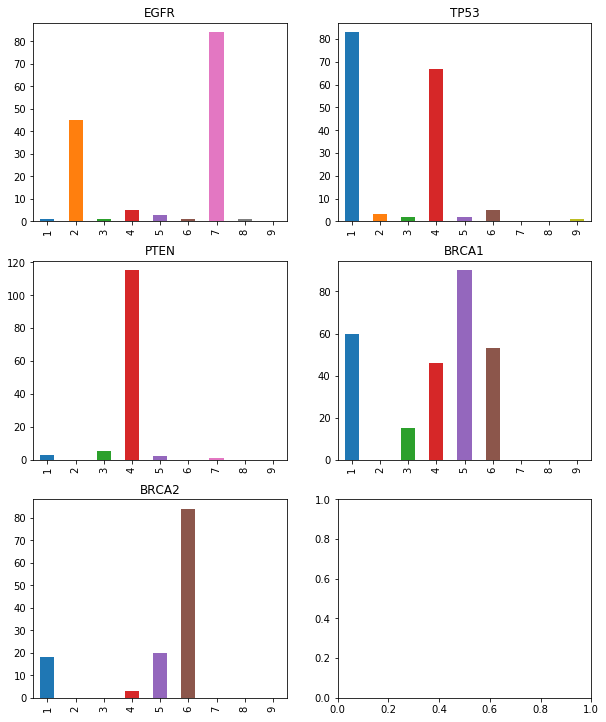

In [82]:
            #Returns object containing counts of unique values contain the relative frequencies of them.
train_top=df_train_var.Gene.value_counts(normalize=True)*100 

most_freq_genes=train_top[train_top>3].index # get all genes that thay have frequency > 3

train_top_genes=df_train_var[df_train_var.Gene.isin(most_freq_genes)]  # return the most_freq_genes with the variation & class

unique_class=df_train_var.Class.unique()    # Returns the sorted unique elements of  class [1,2,3,4,5,6,7,8,9].
unique_genes=train_top_genes.Gene.unique() # ['EGFR' 'TP53' 'PTEN' 'BRCA1' 'BRCA2']

plt.rcParams["figure.figsize"] = (10,5)
fig, axes = plt.subplots(nrows=3, ncols=2)


row=0
col=0
for i in range(0,5): 
    ax1=axes[row,col]         
                                                                               # reindex :Conform DataFrame to new index
    train_top_genes[train_top_genes.Gene==unique_genes[i]].Class.value_counts().reindex(unique_class).plot(kind='bar',ax=ax1,title=unique_genes[i])
    col=col+1
    if(col==2):
        col=0
        row=row+1
    plt.subplots_adjust(top=2)

In [7]:
from nltk.stem import WordNetLemmatizer
from string import punctuation
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

df_merge = df_train_var.merge(df_train_txt, how="inner", left_on="ID", right_on="ID")

custom_words = ["fig", "figure", "et", "al", "al.", "also",
                "data", "analyze", "study", "table", "using",
                "method", "result", "conclusion", "author", 
                "find", "found", "show", '"', "’", "“", "”"
                ,"(",")","*","&","^","#","@","!","[","]","}","{","%",".","-",",",":",";","'"]
stop_words = set(stopwords.words('english') + custom_words)


wordnet_lemmatizer = WordNetLemmatizer() # to get the actual word 
              # str.cat() :Concatenate strings in the Series/Index with given separator.
class_corpus = df_merge.groupby('Class').apply(lambda x: x['Text'].str.cat()) 
               # counter() to count every word in text
class_corpus = class_corpus.apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(x) 
     if w.lower() not in stop_words and not w.isdigit() and len(w) > 1]
))
print(class_corpus)


Class
1    {'Cyclin-dependent': 2, 'kinase': 184, 'CDKs':...
2    {'Abstract': 3, 'Background': 2, 'Non-small': ...
3    {'Recent': 1, 'evidence': 4, 'demonstrated': 1...
4    {'Oncogenic': 12, 'mutation': 4299, 'monomeric...
5    {'Oncogenic': 4, 'mutation': 668, 'monomeric':...
6    {'Abstract': 1, 'Background': 1, 'Non-small': ...
7    {'Sequencing': 6, 'study': 150, 'identified': ...
8    {'RNA': 40, 'maturation': 1, 'important': 12, ...
9    {'RNA': 484, 'maturation': 33, 'important': 75...
dtype: object


In [17]:
class_freq = class_corpus.apply(lambda x: x.most_common(10))
print(class_freq)

Class
1    [(cell, 3735), (mutation, 3544), (protein, 177...
2    [(cell, 1187), (mutation, 497), (cyclin, 400),...
3    [(mutation, 99), (CBL, 99), (case, 71), (aUPD,...
4    [(mutation, 4299), (cell, 3148), (CBL, 2067), ...
5    [(mutation, 668), (variant, 567), (CBL, 357), ...
6    [(mutation, 269), (c-CBL, 152), (CBL, 124), (c...
7    [(mutation, 2255), (cell, 1821), (TERT, 1184),...
8    [(mutation, 277), (gene, 232), (cell, 216), (S...
9    [(SF3B1, 2300), (cell, 1993), (mutation, 1887)...
dtype: object


In [18]:
class_freq = pd.DataFrame.from_records(class_freq.values.tolist()).set_index(class_freq.index)
print(class_freq)

                      0                 1                 2                 3  \
Class                                                                           
1          (cell, 3735)  (mutation, 3544)   (protein, 1773)    (cancer, 1621)   
2          (cell, 1187)   (mutation, 497)     (cyclin, 400)     (kinase, 374)   
3        (mutation, 99)         (CBL, 99)        (case, 71)        (aUPD, 42)   
4      (mutation, 4299)      (cell, 3148)       (CBL, 2067)    (cancer, 1707)   
5       (mutation, 668)    (variant, 567)        (CBL, 357)    (protein, 271)   
6       (mutation, 269)      (c-CBL, 152)        (CBL, 124)       (cell, 113)   
7      (mutation, 2255)      (cell, 1821)      (TERT, 1184)    (cyclin, 1053)   
8       (mutation, 277)       (gene, 232)       (cell, 216)      (SF3B1, 213)   
9         (SF3B1, 2300)      (cell, 1993)  (mutation, 1887)  (splicing, 1540)   

                     4                5                6  \
Class                                           

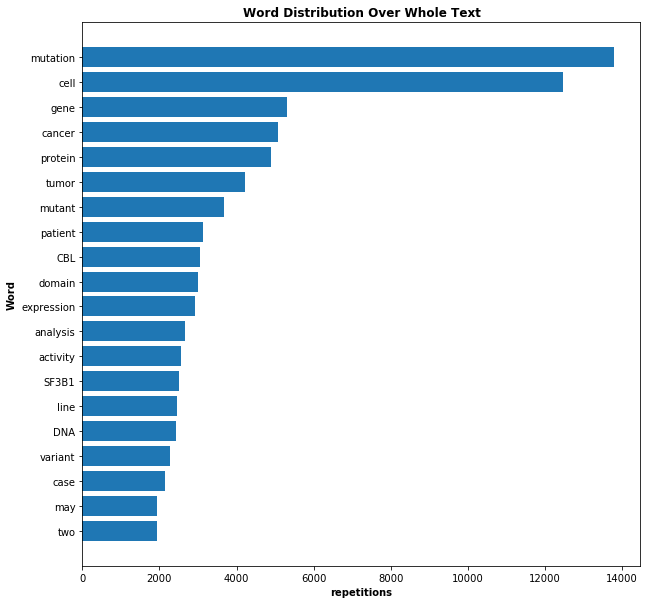

In [16]:

whole_text_freq = class_corpus.sum()  # the whole text

fig, ax = plt.subplots(figsize=(10,10))

label, word_count = zip(*whole_text_freq.most_common(20)) # label = Genes  && word_count for a word in all texts
                                                     # ‘center’: Center the bars on the y positions.
ax.barh(range(len(label)), word_count, align='center') # range(len(label)) scaller y axis &&  word_count The width of the bars

ax.set_yticks(np.arange(len(label)))
ax.set_yticklabels(label)  # set labels name
ax.invert_yaxis() # labels read top-to-bottom

ax.set_title('Word Distribution Over Whole Text',fontweight='bold')
ax.set_xlabel('repetitions',fontweight='bold')
ax.set_ylabel('Word',fontweight='bold')

plt.show()


In [15]:
print(whole_text_freq.most_common(10))

[('mutation', 13795), ('cell', 12478), ('gene', 5298), ('cancer', 5067), ('protein', 4891), ('tumor', 4214), ('mutant', 3686), ('patient', 3137), ('CBL', 3042), ('domain', 3004)]
